# **Brain Stroke Analysis**

## **Introduction**

This is an data analysis of the **brain_stroke** dataset. The source of the dataset is: https://www.kaggle.com/datasets/jillanisofttech/brain-stroke-dataset

The purpose of this analysis is to explore how different factors are correlated with brain stroke occurrence.

Importing essential modules for data manipulation.

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

### **Data Preparation and Cleaning**

Reading data from the file.

In [76]:
unprepared_df = pd.read_csv('d:/brain_stroke.csv')

Taking an overall look at the data to become familiar with it.

In [77]:
unprepared_df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


Taking a closer look at the data to check for data integrity.

In [78]:
unprepared_df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


After examining the data, we can confirm that the numbers fall within normal ranges. Additionally, all numerical columns have the same number of rows, indicating that there are no null values.

Looking at the dataset columns list:

In [79]:
list(unprepared_df.columns)

['gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status',
 'stroke']

After getting familiar with the data, let's analyze the impact of factors such as work type, residence type, glucose level, and smoking status on the disease.

First, we'll select the columns we will work with.

In [80]:
selected_columns = ['age', 'work_type', 'Residence_type', 'avg_glucose_level', 'smoking_status', 'stroke']

Next, let's copy this data to a new DataFrame.

In [81]:
df = unprepared_df[selected_columns].copy()
df

,age,work_type,Residence_type,avg_glucose_level,smoking_status,stroke
0,67.0,Private,Urban,228.69,formerly smoked,1
1,80.0,Private,Rural,105.92,never smoked,1
2,49.0,Private,Urban,171.23,smokes,1
3,79.0,Self-employed,Rural,174.12,never smoked,1
4,81.0,Private,Urban,186.21,formerly smoked,1
...,...,...,...,...,...,...
4976,41.0,Private,Rural,70.15,formerly smoked,0
4977,40.0,Private,Urban,191.15,smokes,0
4978,45.0,Govt_job,Rural,95.02,smokes,0
4979,40.0,Private,Rural,83.94,smokes,0


Now, let's check for any missing values in the dataset.

In [82]:
df.isnull().sum()

age                  0
work_type            0
Residence_type       0
avg_glucose_level    0
smoking_status       0
stroke               0
dtype: int64

As we can see, there are no missing values in the dataset.

## **Asking and Answering Questions**

### **Question 1**: How does smoking influences disease?

Let's group the data to see how many people had the disease for each smoking status and sort it in descending order.

In [83]:
smoking_status_stroke = df.groupby('smoking_status')[['stroke']].sum().sort_values(by='stroke', ascending=False)
smoking_status_stroke

,stroke
smoking_status,
never smoked,89
formerly smoked,70
Unknown,47
smokes,42


The pie chart displays the distribution of strokes based on smoking status.

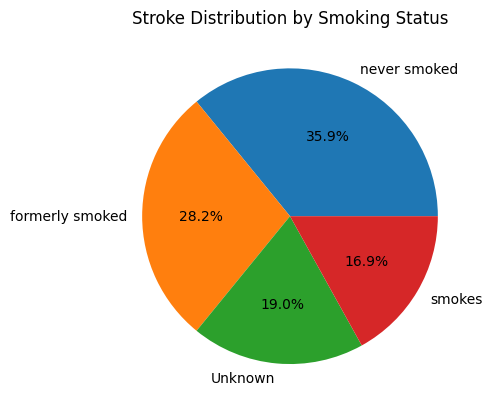

In [84]:
smoking_status_stroke.plot(kind='pie', y='stroke', autopct='%1.1f%%', legend=False)
plt.ylabel('')
plt.title('Stroke Distribution by Smoking Status')
plt.show()

#### **Conclusion 1:** The majority of stroke cases were observed in individuals who never smoked or had formerly smoked.

### **Question 2:** Is there an age-related trend in stroke occurrences?

First, let's check the minimum, maximum, and average ages in the dataset.

In [85]:
df_stroke = df.loc[df.stroke == 1]

age_statistics = df_stroke['age'].describe()[['mean', 'min', 'max']].round()
age_statistics

mean    68.0
min      1.0
max     82.0
Name: age, dtype: float64

The **average** age of individuals with strokes is **68**, with ages ranging from **1** to **82**. Now, let's look at the age distribution.

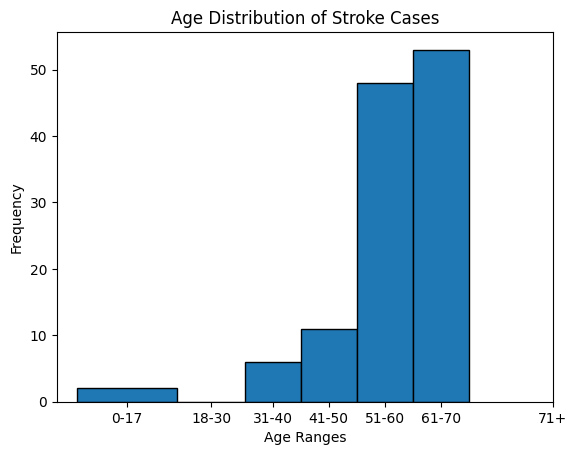

In [86]:
bins = [0, 18, 30, 40, 50, 60, 70,]
labels = ['0-17', '18-30', '31-40', '41-50', '51-60', '61-70', '71+']

plt.hist(df_stroke["age"], bins=bins, edgecolor='black')
plt.xticks([9, 24, 35, 45, 55, 65, 85], labels)
plt.title("Age Distribution of Stroke Cases")
plt.xlabel("Age Ranges")
plt.ylabel("Frequency")
plt.show()

It seems there are no stroke cases for individuals aged between 18 and 30, so let's verify if this is indeed the case.

In [87]:
age_18_30_stroke = df_stroke[(df_stroke['age'] >= 18) & (df_stroke['age'] <= 30)]
age_18_30_stroke

,age,work_type,Residence_type,avg_glucose_level,smoking_status,stroke


After checking, there are no stroke cases in the 18-30 age range.

#### **Conclusion 2:** Stroke cases increase with age, particularly after 40, highlighting age as a key factor in stroke occurrence.

### **Question 3:** Which Residence have more brain stroke cases?

Let's group the data by residence type and visualize stroke cases with a bar plot.

In [88]:
residences_cases = df.groupby('Residence_type')[['stroke']].sum()
residences_cases 

,stroke
Residence_type,
Rural,113
Urban,135


Rural areas have 113 stroke cases, while urban areas have 135. It appears strokes are slightly more common in urban areas.

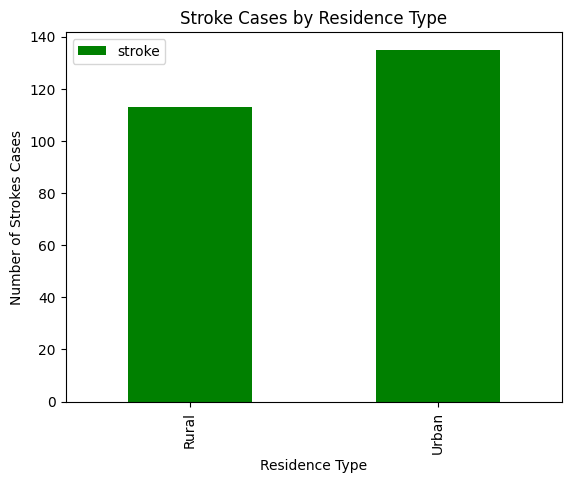

In [89]:
residences_cases.plot(kind="bar", color="green", title="Stroke Cases by Residence Type")
plt.xlabel("Residence Type")
plt.ylabel("Number of Strokes Cases")
plt.show()

There seems to be a slight difference in stroke cases between rural and urban areas, so let's perform a Chi-square test to check if the relationship is statistically significant.

In [90]:
stroke_0_by_residence = df[df['stroke'] == 0].groupby('Residence_type')['stroke'].count()
stroke_1_by_residence = df[df['stroke'] == 1].groupby('Residence_type')['stroke'].count()

contingency_table = pd.DataFrame({
    'Stroke = 1': stroke_1_by_residence,
    'Stroke = 0': stroke_0_by_residence
}).fillna(0)

chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print(f"Expected values: \n{expected}\n")

if p < 0.05:
    print("There is a significant relationship between stroke occurrence and residence type.")
else:
    print("There is no significant relationship between stroke occurrence and residence type.")


Chi-square statistic: 1.2076753969498255
P-value: 0.2717929927168985
Degrees of freedom: 1
Expected values: 
[[ 121.93374824 2327.06625176]
 [ 126.06625176 2405.93374824]]

There is no significant relationship between stroke occurrence and residence type.


The Chi-square test shows that there’s no significant connection between living in a rural or urban area and having a stroke.

#### **Conclusion 3:** There is no significant relationship between residence type and stroke occurrence.

### **Question 4:** Does glucose level affect brain stroke?

Visualizing glucose levels for people with and without stroke to identify if extreme glucose levels are more common among stroke patients.

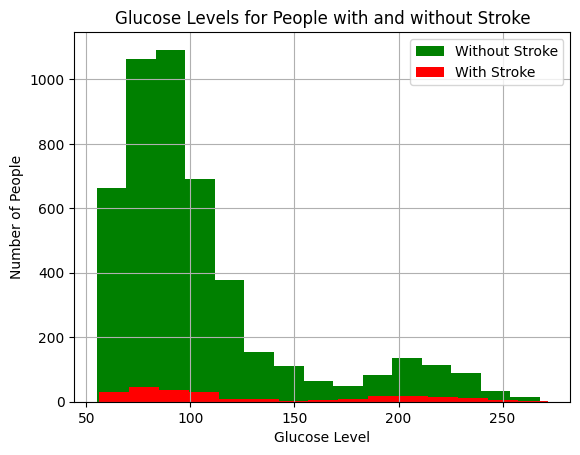

In [91]:
stroke_1 = df[df['stroke'] == 1]['avg_glucose_level']
stroke_0 = df[df['stroke'] == 0]['avg_glucose_level']

plt.hist(stroke_0, bins=15, facecolor='g', label='Without Stroke')
plt.hist(stroke_1, bins=15, facecolor='r', label='With Stroke')

plt.title('Glucose Levels for People with and without Stroke')
plt.xlabel('Glucose Level')
plt.ylabel('Number of People')
plt.legend(loc='upper right')
plt.grid(True)

plt.show()

The visualization shows that stroke patients tend to have either low or high glucose levels, while those without a stroke are more likely to have glucose levels in the normal range.

Let's use a contingency table to calculate the percentage of stroke occurrences for each glucose level group. This helps us understand which glucose level group has a higher frequency of stroke. The results are visualized with a heatmap to highlight the patterns more clearly.

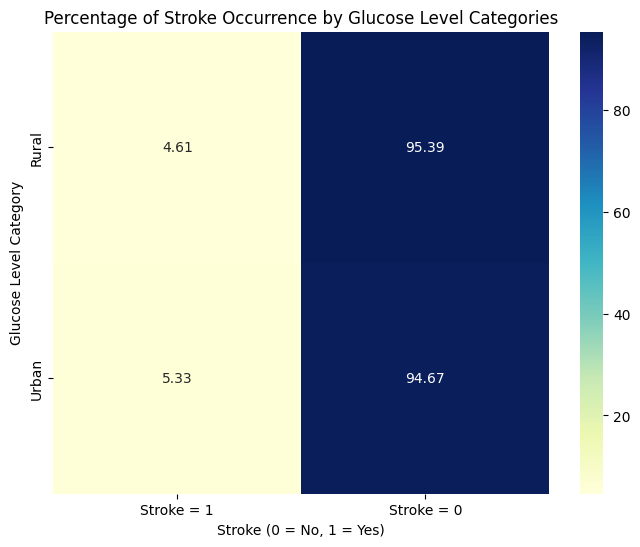

In [92]:
stroke_percentage = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100

plt.figure(figsize=(8, 6))
sns.heatmap(stroke_percentage, annot=True, cmap='YlGnBu', fmt='.2f', cbar=True)
plt.title('Percentage of Stroke Occurrence by Glucose Level Categories')
plt.xlabel('Stroke (0 = No, 1 = Yes)')
plt.ylabel('Glucose Level Category')
plt.show()


The heatmap shows that as glucose levels increase, the percentage of people with a stroke also rises.

#### **Conclusion 4:** Higher glucose levels are linked to a higher percentage of stroke occurrences, suggesting a potential connection.

### **Question 5:** Which work type has the highest number of brain stroke cases?

Let's group the data to identify which work type has the most stroke cases.

In [93]:
work_types_cases = df.groupby('work_type')[['stroke']].sum()
work_types_cases

,stroke
work_type,
Govt_job,33
Private,148
Self-employed,65
children,2


Private job type has the most stroke cases, so let's visualize the data and compare it to the overall distribution.

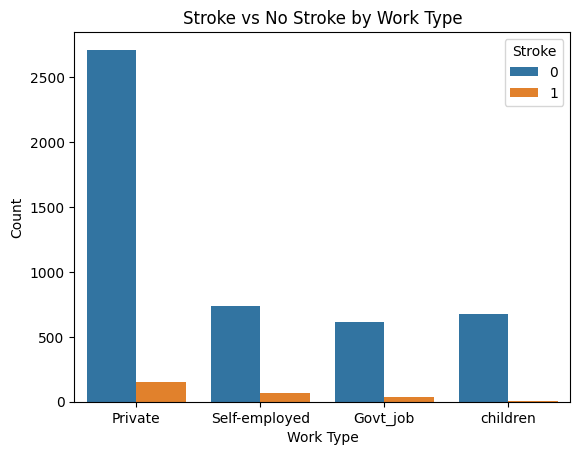

In [94]:
sns.countplot(x='work_type', hue='stroke', data=df)

plt.title('Stroke vs No Stroke by Work Type')
plt.xlabel('Work Type')
plt.ylabel('Count')
plt.legend(title='Stroke', loc='upper right')
plt.show()

Most records belong to the private job type, so comparing stroke cases in percentages is necessary for a clearer analysis.

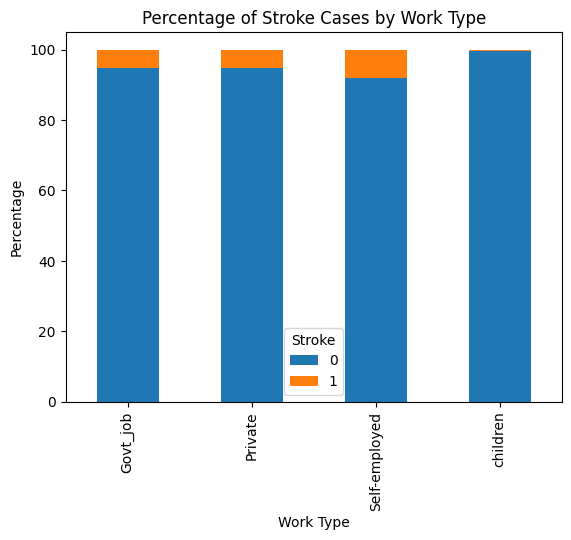

In [95]:
stroke_by_work = df.groupby(['work_type', 'stroke']).size().unstack(fill_value=0)
stroke_by_work_percentage = stroke_by_work.div(stroke_by_work.sum(axis=1), axis=0) * 100

stroke_by_work_percentage.plot(kind='bar', stacked=True)
plt.title('Percentage of Stroke Cases by Work Type')
plt.xlabel('Work Type')
plt.ylabel('Percentage')
plt.legend(title='Stroke')
plt.show()


Government and private job types have similar stroke percentages, while self-employed individuals have the highest percentage of stroke cases.

#### **Conclusion 5:** Self-employed people show the highest stroke percentage, but more data on job types is needed to make a solid conclusion, as the current data might be biased.

## **Key Findings and Insights**

- Smoking and Stroke: The majority of stroke cases were observed in people who have never smoked or who previously smoked.

- Age and Stroke: Stroke occurrences increase significantly with age, particularly after 40, indicating that age plays a crucial role in stroke risk.

- Residence and Stroke: No significant relationship was found between residence type (rural vs. urban) and stroke occurrence.

- Glucose Levels and Stroke: A higher percentage of stroke cases are associated with both low and high glucose levels, suggesting a potential link between glucose levels and stroke risk.

- Job Type and Stroke: Self-employed individuals showed the highest stroke percentage, but more comprehensive data on job types is required to draw definitive conclusions, as the existing data may be biased.

## **Author:**
Vitalii Karapuz

29/03/2025